# Seaborn - LmPlot, PairPlot

산점도 그래프의 확장형

## #01. 준비작업

### [1] 패키치 참조

In [1]:
import sys
from pandas import read_excel
from matplotlib import pyplot as plt
import seaborn as sb

### [2] 그래프 초기화

In [2]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

### [3] 데이터 가져오기

팽귄의 서식지와 종에 따른 신체 특성을 조사한 데이터

| 변수 | 설명 |
|-------------------|-------|
| species           | 팽귄 종  |
| island            | 서식지   |
| bill_length_mm    | 부리 길이 |
| bill_depth_mm     | 부리 두께 |
| flipper_length_mm | 날개 길이 |
| body_mass_g       | 몸무게   |
| sex               | 성별    |

In [3]:
origin = read_excel('C:/Users/Jihwan/01Class/D.탐색적데이터분석/D.DataAnalysis/수업data/penguins.xlsx')
origin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
329,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
330,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
331,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
332,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


### [4] 데이터 전처리

범주형 데이터에 대한 카테고리 타입 변환

In [4]:
df = origin.astype({'species':'category', 'island':'category','sex':'category'})
df.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm       int64
body_mass_g             int64
sex                  category
dtype: object

## #02. LmPlot

scatterplot과 regplot의 결합형

`plt.figure()`를 사용할 필요가 없다.

| 구분 | hue 파라미터 | 추세선 지원 |
|---|---|---|
| scatterplot | `O` | `X` |
| regplot | `X` | `O` |
| lmplot | `O` | `O` |

### [1] 기본 사용 방법

분산형 차트에 추세선을 추가함

기본 파라미터는 `regplot()` 메서드와 동일

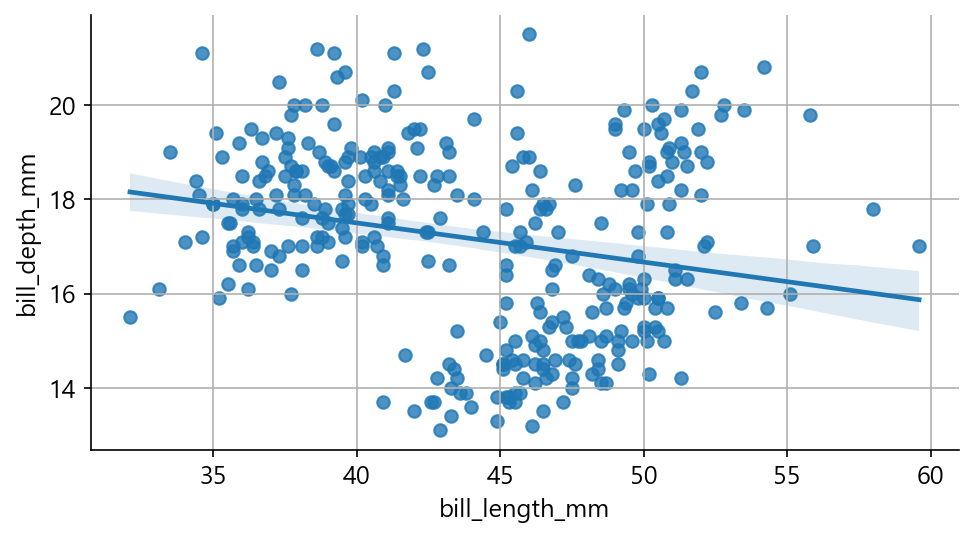

In [5]:
g = sb.lmplot(x='bill_length_mm',data=origin, y='bill_depth_mm')
g.fig.set_figwidth(7)
g.fig.set_figheight(3.5)
g.fig.set_dpi(150)

plt.grid()
plt.show()
plt.close()


### [2] 범주별 구분

다른 변수에 대한 회귀 적합성을 조건화하고 색상을 사용하여 표현

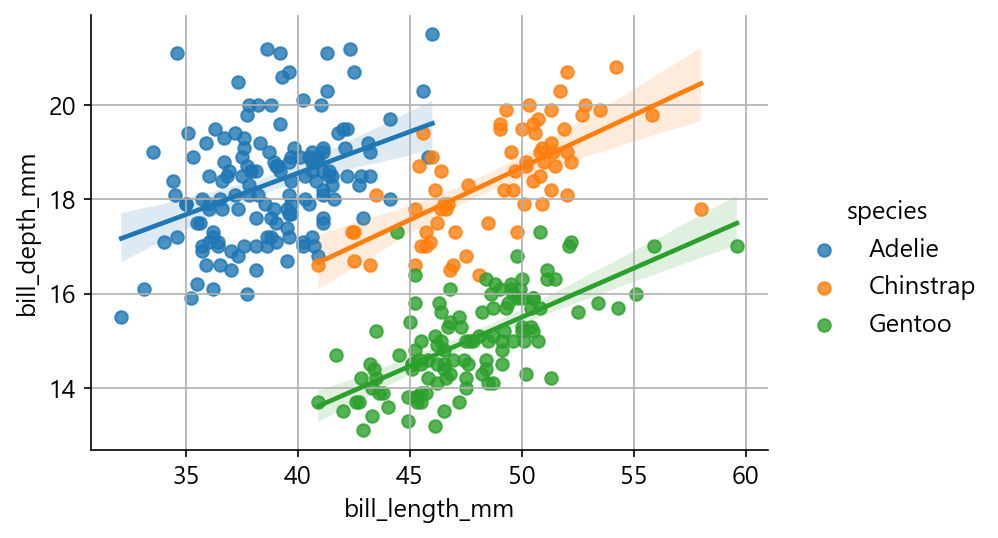

In [6]:
g = sb.lmplot(x='bill_length_mm',data=origin, y='bill_depth_mm',
              hue='species')
g.fig.set_figwidth(7)
g.fig.set_figheight(3.5)
g.fig.set_dpi(150)

plt.grid()
plt.show()
plt.close()


### [3] 조건별 병렬 시각화

#### (1) 범주에 따라 구분한 후 하위 변수를 사용하여 병렬 분할

g = sb.lmplot(x='bill_length_mm',data=origin, y='bill_depth_mm',
              col='species', hue='sex')
g.fig.set_figwidth(10)
g.fig.set_figheight(3.5)
g.fig.set_dpi(150)

plt.legend()
plt.grid()
plt.show()
plt.close()


#### (2) 모든 조건에 따라 행,열로 분할

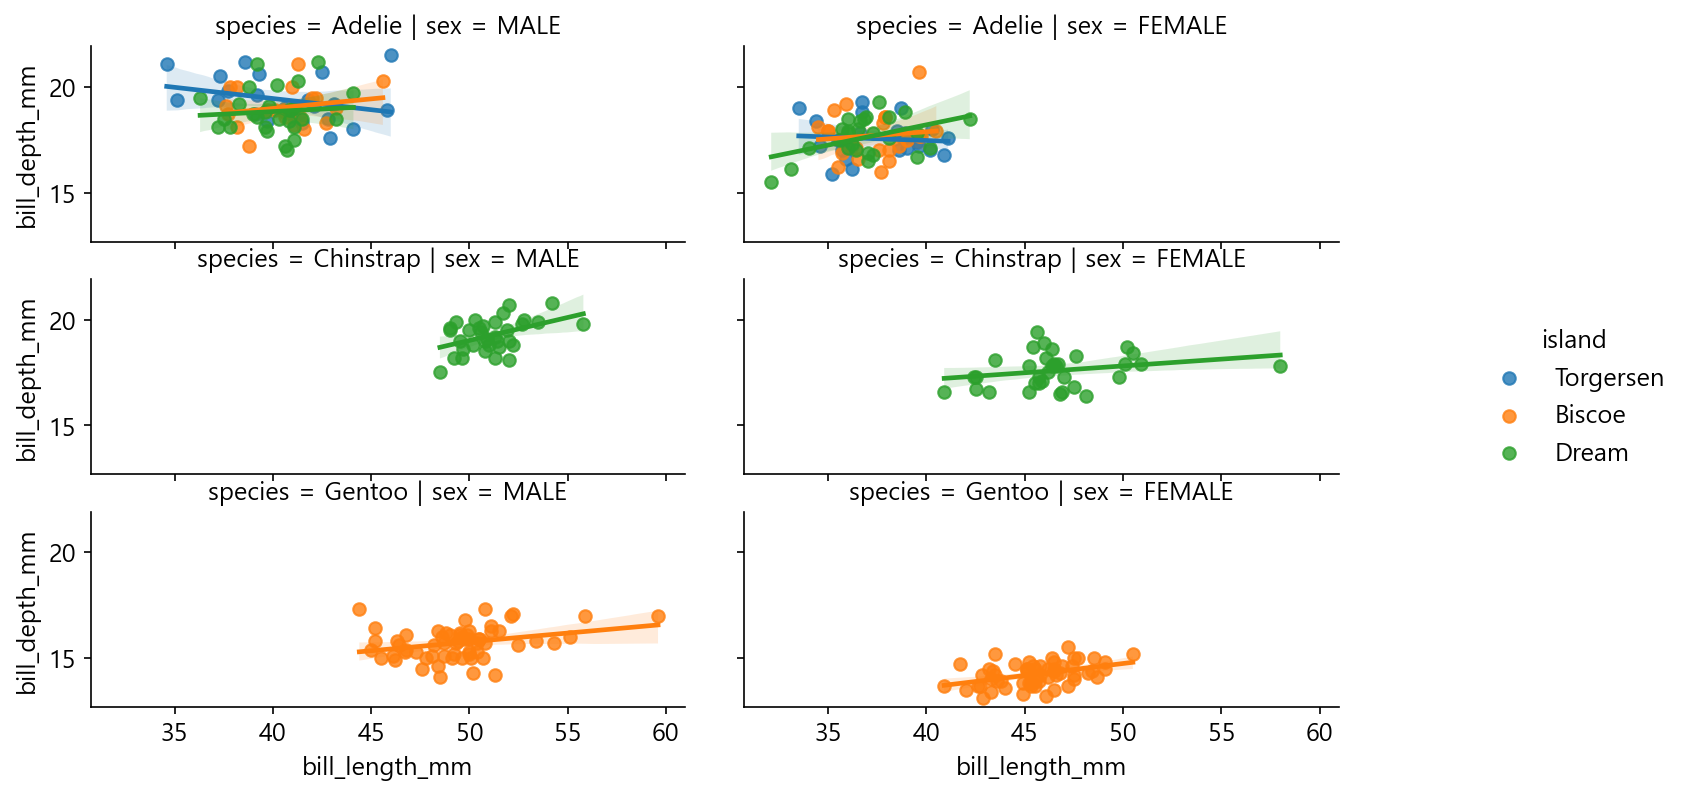

In [21]:
g = sb.lmplot(x='bill_length_mm',data=origin, y='bill_depth_mm',
              row='species',hue='island',
              col='sex',height=3)
g.fig.set_figwidth(12)
g.fig.set_figheight(5)
g.fig.set_dpi(150)


plt.show()
plt.close()


## #03. PairPlot (산점도 행렬)

주어진 데이터의 각 변수가 단일 행의 $x$축과 단일 열의 $y$축에서 공유되도록 그리드를 생성한다. (모든 변수에 대한 교차 분석)

대각선 도표는 데이터의 주변 분포를 표시하기 위한 일변량 분포 도표(커널 밀도 곡선)이나 히스토그램이 그려진다.

다소 처리가 느리다.

`plt.figure()`를 사용할 필요는 없다.

### [1] 기본 사용 방법

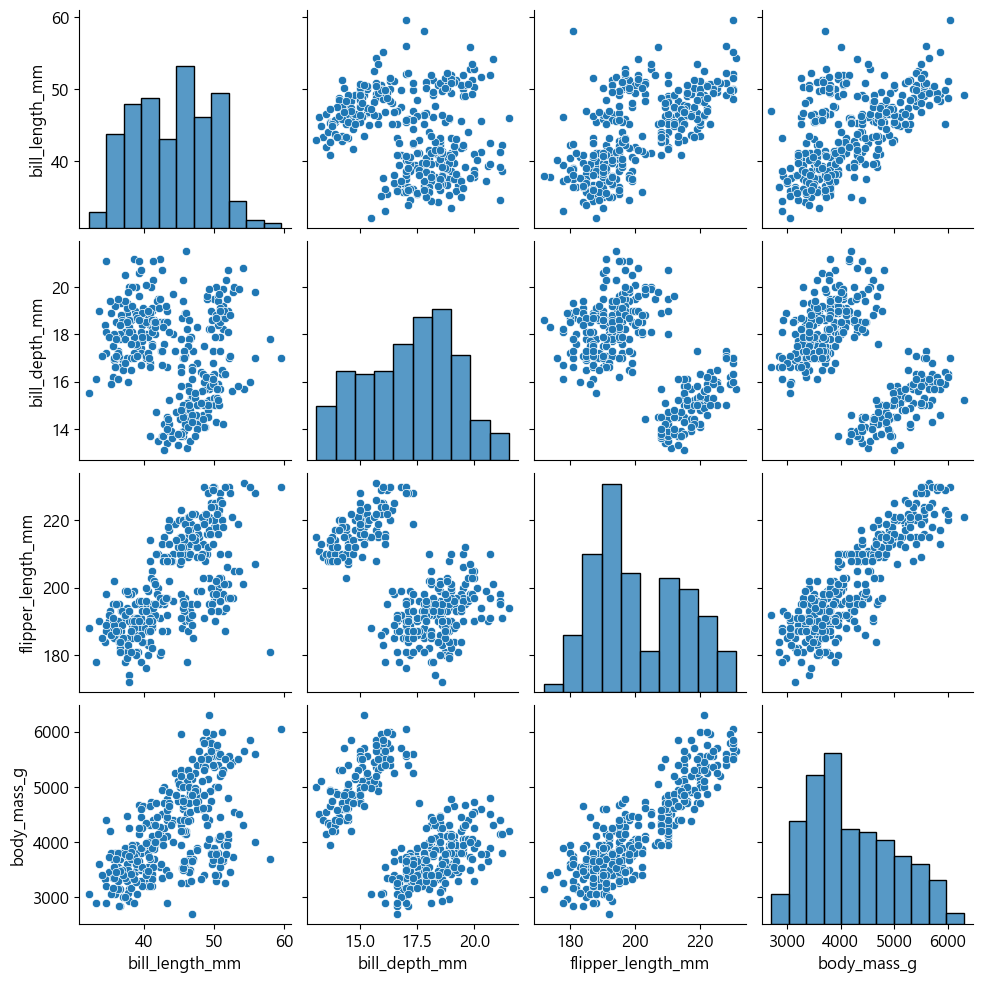

In [22]:
sb.pairplot(df)
plt.grid()
plt.show()
plt.close()

### [2] 범주별 구분

#### (1) `hue` 파라미터 적용

`hue` 파라미터에 변수를 할당하면 hue의미론적 매핑이 추가되고 기본 주변 플롯이 계층화된 커널 밀도 추정(KDE)으로 변경된다.

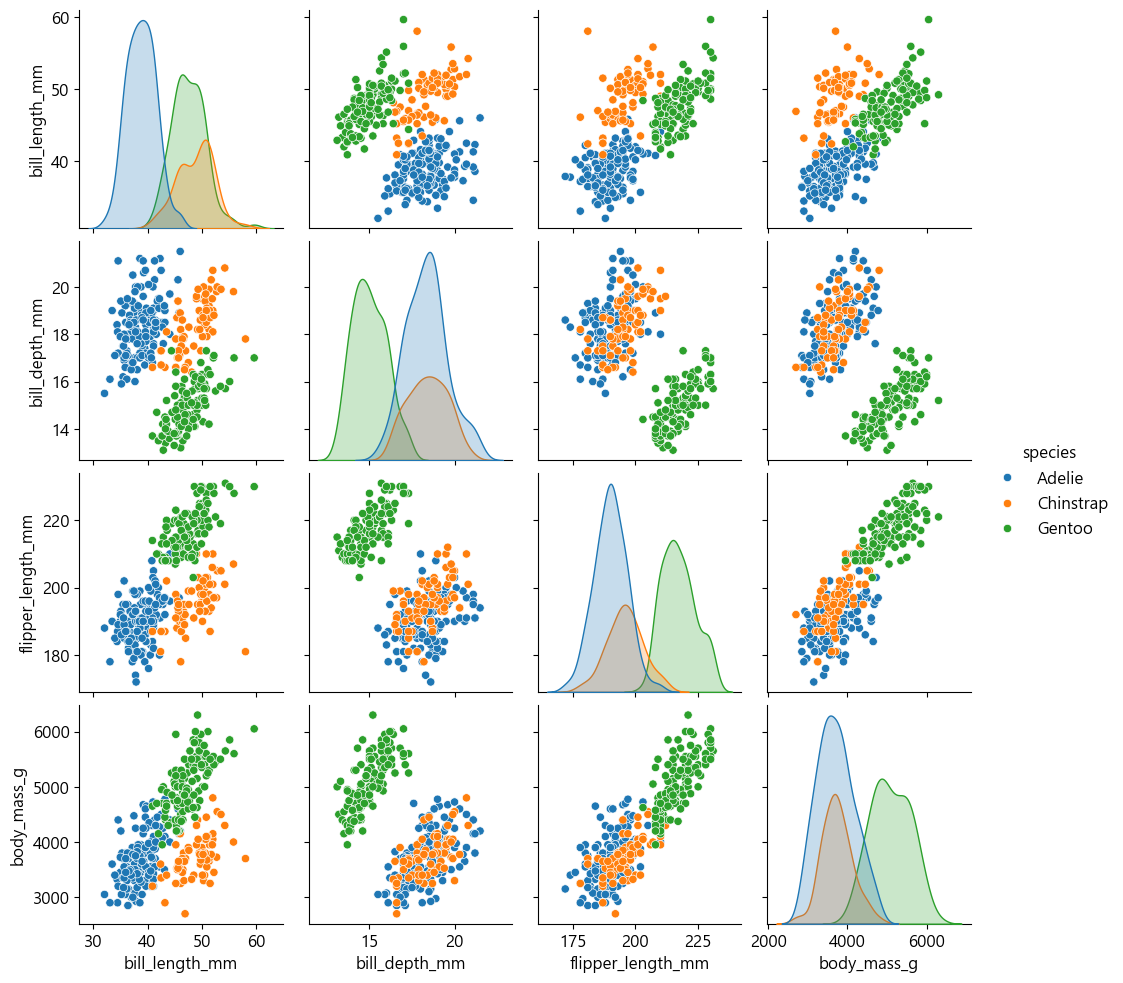

In [23]:
sb.pairplot(df,hue='species')
plt.grid()
plt.show()
plt.close()

#### (2) 히스토그램으로 표시하기

`diag_kind` 파라미터에 `hist`값을 적용한다.

적용 가능한 값: `auto`, `hist`, `kde`

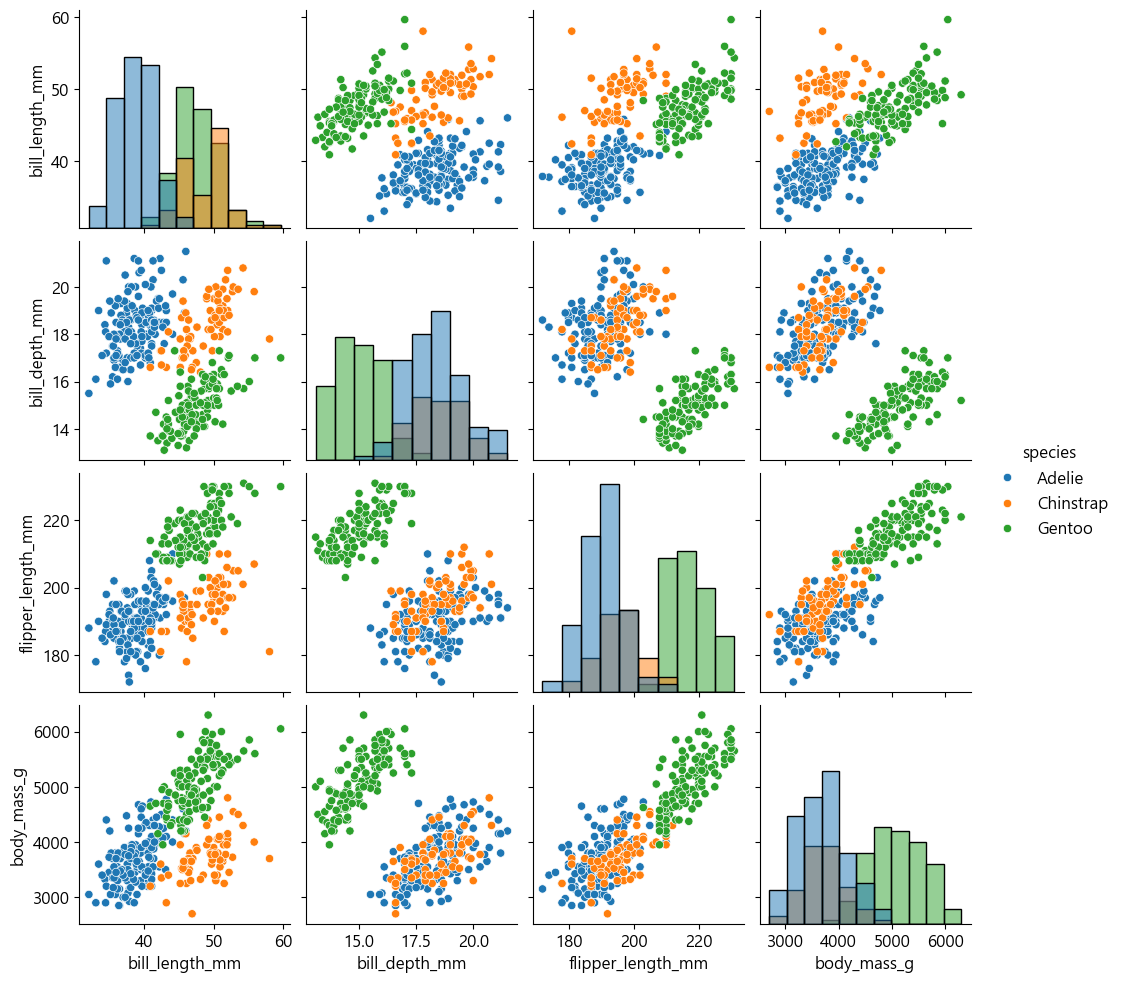

In [24]:
sb.pairplot(df,hue='species',diag_kind='hist')
plt.grid()
plt.show()
plt.close()

### [3] 변수 선택적 적용

`x_vars` 파라미터와 `y_vars` 파라미터에 원하는 변수를 리스트 타입으로 지정한다.

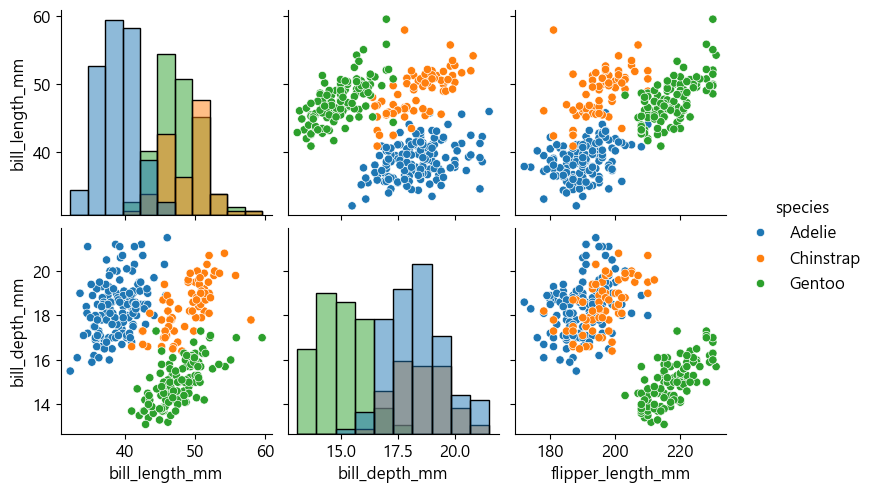

In [25]:
sb.pairplot(df,hue='species',diag_kind='hist',
            x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
            y_vars=['bill_length_mm', 'bill_depth_mm'])

plt.grid()
plt.show()
plt.close()

### [3] 대각선으로 그래프 나누기

#### (1) 한쪽 면만 표시하기

`corner=True` 파라미터는 아래쪽 삼각형만 플롯하도록 설정한다.

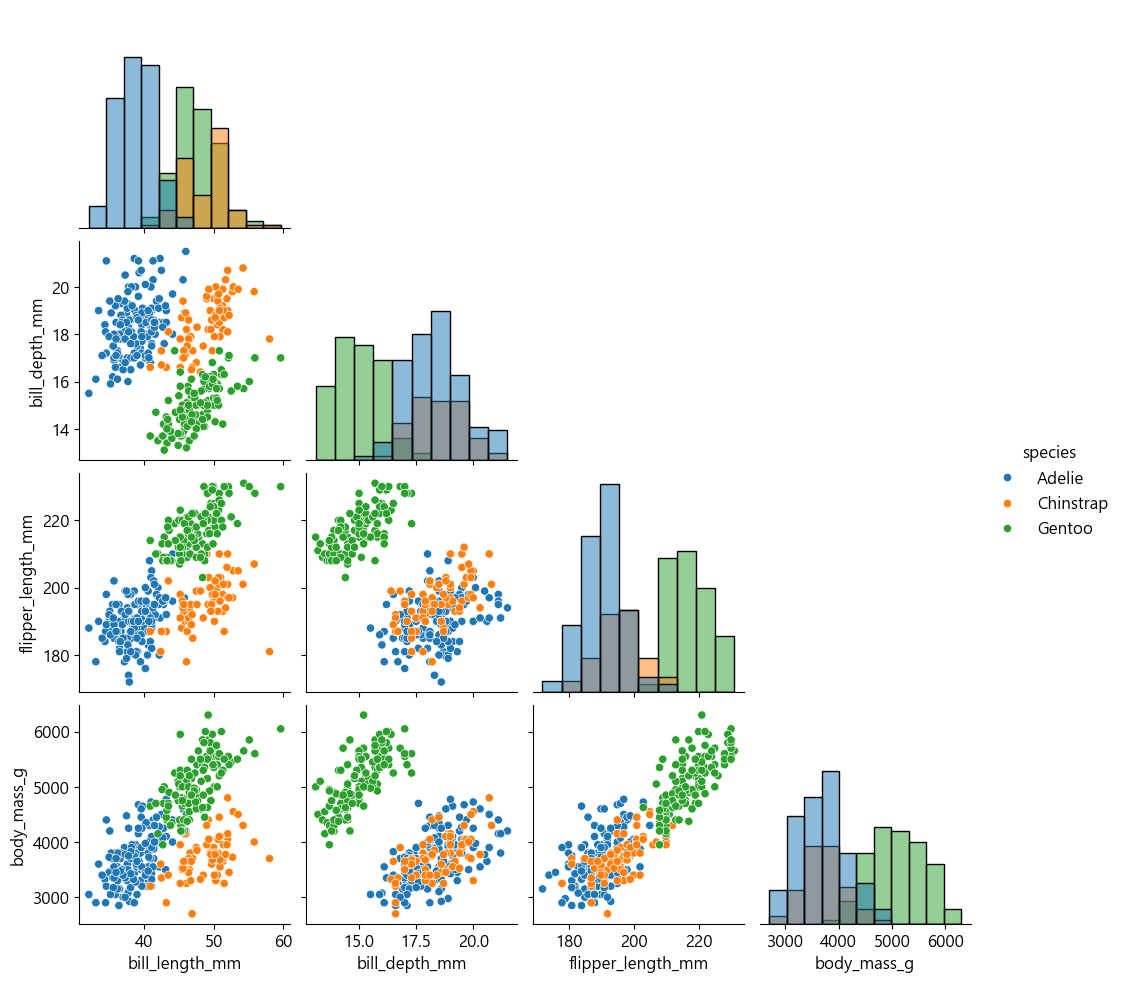

In [26]:
sb.pairplot(df,hue='species',diag_kind='hist',corner=True)
plt.grid()
plt.show()
plt.close()

#### (2) 데이터를 그룹별로 묶어 표시하기

`pairplot()` 메서드가 리턴하는 객체를 받아서 `map_lower()`메서드를 호출한다.

`map_lower()` 메서드에 다른 종류의 함수 이름을 적용하면 대각선 기준으로 서로 다른 종류의 시각화 결과물을 표시할 수 있다.

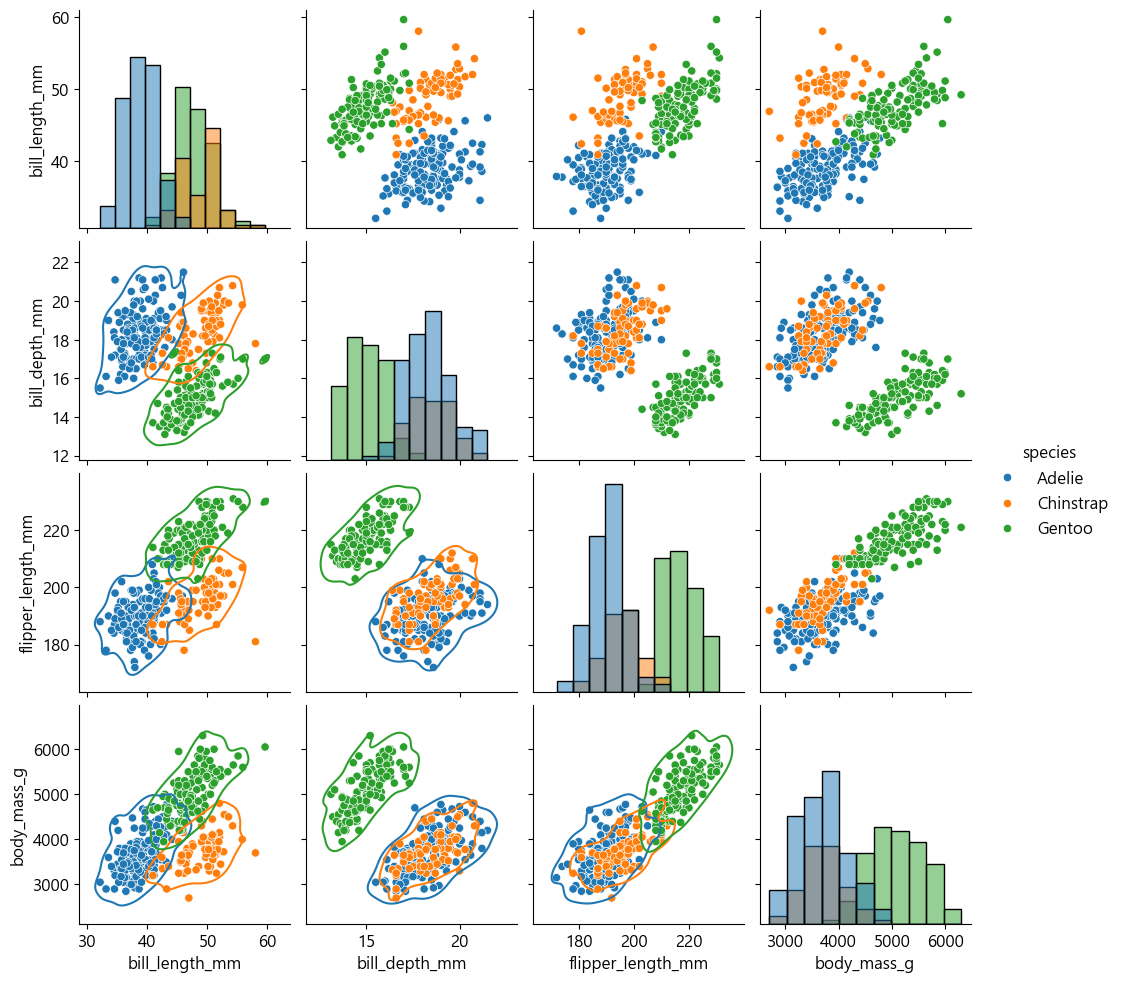

In [29]:
g = sb.pairplot(df, hue='species', diag_kind='hist')
g.map_lower(sb.kdeplot, levels=1, color=0.2)
plt.grid()
plt.show()
plt.close()